### Import the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt

### Extract data

In [11]:
import yfinance as yf
from datetime import datetime

coins = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Litecoin': 'LTC-USD'
}

current_date = datetime.today().strftime('%Y-%m-%d')
current_date

'2023-07-06'

In [12]:
# Fetch data from Yahoo Finance and merge with existing data
crypto_data = pd.DataFrame()  
for coin, ticker_symbol in coins.items():
    print(f"********** {coin} **********")
    data = yf.download(ticker_symbol, '2010-01-01', end=current_date)
    data = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Select the desired columns
    data['Coin'] = coin  # Add a column to identify the coin

    # Merge with existing data
    crypto_data = pd.concat([crypto_data, data])
    
crypto_data.to_csv('merged_data1.csv')



# # Preprocess the merged data
# crypto_data['Date'] = crypto_data.index
# crypto_data.set_index('Date', inplace=True)
# # crypto_data['Coin']=="Ethereum"

********** Bitcoin **********
[*********************100%***********************]  1 of 1 completed
********** Ethereum **********
[*********************100%***********************]  1 of 1 completed
********** Litecoin **********
[*********************100%***********************]  1 of 1 completed


### Check for Null values

In [13]:
print(crypto_data.isna().sum())
k=crypto_data
k.to_csv('crypto.csv')

Open      0
High      0
Low       0
Close     0
Volume    0
Coin      0
dtype: int64


### Shuffle the dataset

In [5]:
shuffled_data = shuffle(crypto_data, random_state=42)
shuffled_data.to_csv('sdata1.csv')
shuffled_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Coin'], dtype='object')

In [7]:
t = pd.read_csv("sdata1.csv",  index_col=False)

k.loc[k['Coin'] == 'Bitcoin', 'Close'].tail(1).iloc[0]

30480.26171875

In [8]:
pd.read_csv("sdata1.csv",  index_col=False)

,Date,Open,High,Low,Close,Volume,Coin
0,2018-08-08,68.162804,68.162804,62.138302,62.490398,313187000,Litecoin
1,2017-09-23,48.157101,49.789501,46.687000,49.271599,142072992,Litecoin
2,2016-06-03,537.682007,574.638000,536.919983,569.193970,122020000,Bitcoin
3,2022-08-30,1553.188965,1600.461182,1480.831787,1523.838867,21835784470,Ethereum
4,2016-12-23,864.888000,925.117004,864.677002,921.984009,275564000,Bitcoin
...,...,...,...,...,...,...,...
8458,2016-01-05,3.492000,3.508190,3.453720,3.469670,2104650,Litecoin
8459,2023-04-19,2103.946289,2104.857178,1928.582886,1936.403442,13779745451,Ethereum
8460,2015-01-26,2.245490,2.385360,2.060700,2.081050,8803090,Litecoin
8461,2017-01-24,910.677002,924.145020,892.286011,892.687012,111349000,Bitcoin


### Label encode the Bitcoin names:

In [5]:
df = pd.read_csv("sdata1.csv",  index_col=False)
df=pd.DataFrame(df)

label_encoder = LabelEncoder()
df['Coin'] = label_encoder.fit_transform(df['Coin'])



In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Coin'], dtype='object')

## Change dates into usable format

In [6]:
def clean_data(df):
    df = df.dropna()
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
    df['Date'] = pd.to_datetime(df['Date'])
    df['date'] = (df['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

#     df = df.drop('Date',axis=1 )
    return df

df = clean_data(df)

print(df)

           Date         Open         High          Low        Close  \
0    2019-05-15    91.661552   103.140015    90.817268   101.744568   
1    2019-09-05    67.308739    67.622856    64.615906    65.395569   
2    2021-12-25  4049.781982  4138.564941  4027.927002  4093.281006   
3    2020-03-31  6430.606445  6504.515137  6374.162109  6438.644531   
4    2016-07-24   655.409973   663.109985   652.793030   661.284973   
...         ...          ...          ...          ...          ...   
8470 2015-12-28     3.477810     3.529720     3.456750     3.466030   
8471 2023-04-15  2101.616455  2111.075439  2076.510742  2092.466797   
8472 2015-01-18     1.296030     1.372280     1.233360     1.333330   
8473 2017-01-24   910.677002   924.145020   892.286011   892.687012   
8474 2020-03-12    48.449230    48.558250    30.627010    30.930883   

           Volume  Coin        date  
0      5168624436     2  1557878400  
1      2379080140     2  1567641600  
2     10894785525     1  16403904

### Scale the necessary values:

In [12]:
df.sort_values(by="Date", inplace=True)


# Exclude the 'Date' column from scaling

columns_to_scale = ['Open', 'High', 'Low', 'Close','Volume']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Create a new DataFrame with scaled data
sdf = pd.DataFrame(scaled_data, columns=columns_to_scale, index=df.index)

# Concatenate the 'Date' column with the scaled DataFrame]
sdf['date']=df['date']
sdf['Date1'] = df['Date']
sdf['Coin'] = df['Coin']

# Print the head of the scaled DataFrame
print(sdf.tail())

          Open      High       Low     Close    Volume        date      Date1   
484   0.454600  0.447791  0.456291  0.452116  0.034611  1687564800 2023-06-24  \
896   0.001333  0.001335  0.001296  0.001311  0.001898  1687564800 2023-06-24   
2838  0.452178  0.451239  0.456860  0.451103  0.036194  1687651200 2023-06-25   
1234  0.001311  0.001293  0.001296  0.001289  0.001387  1687651200 2023-06-25   
8385  0.027753  0.028024  0.028167  0.028111  0.019766  1687651200 2023-06-25   

      Coin  
484      0  
896      2  
2838     0  
1234     2  
8385     1  


In [19]:
sdf

,Open,High,Low,Close,Volume,date,Date1,Coin
1959,0.006880,0.006786,0.006799,0.006752,0.000059,1410912000,2014-09-17,0
3408,0.000058,0.000056,0.000058,0.000058,0.000007,1410912000,2014-09-17,2
275,0.000058,0.000054,0.000052,0.000052,0.000012,1410998400,2014-09-18,2
6368,0.006746,0.006622,0.006206,0.006265,0.000097,1410998400,2014-09-18,0
6657,0.006261,0.006200,0.005776,0.005826,0.000107,1411084800,2014-09-19,0
...,...,...,...,...,...,...,...,...
484,0.454600,0.447791,0.456291,0.452116,0.034611,1687564800,2023-06-24,0
896,0.001333,0.001335,0.001296,0.001311,0.001898,1687564800,2023-06-24,2
2838,0.452178,0.451239,0.456860,0.451103,0.036194,1687651200,2023-06-25,0
1234,0.001311,0.001293,0.001296,0.001289,0.001387,1687651200,2023-06-25,2


In [20]:
sdf.to_csv('sdf1.csv')

### Set the required features for dependent and independent variable

In [10]:
X = sdf.drop(["Close", 'Date1'], axis=1)
y = sdf[["Close", 'Coin']]


### Split the dataset into train and test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Coin'])

In [12]:
X_train

,Open,High,Low,Volume,date,Coin
8370,0.000050,0.000047,0.000049,0.000003,1411689600,2
1455,0.321530,0.316934,0.304443,0.086516,1678320000,0
8197,0.004574,0.004807,0.004386,0.027858,1620864000,2
4923,0.003893,0.003869,0.003922,0.000076,1439510400,0
7259,0.003710,0.003893,0.003708,0.027535,1558828800,1
...,...,...,...,...,...,...
6491,0.016509,0.017336,0.016800,0.000806,1489190400,0
7160,0.000694,0.000686,0.000692,0.007585,1574899200,2
558,0.152891,0.156984,0.154636,0.101015,1600041600,0
3084,0.097711,0.096997,0.098978,0.011609,1539648000,0


In [17]:
y_train

,Close,Coin
8370,0.000048,2
1455,0.301364,0
8197,0.004673,2
4923,0.003915,0
7259,0.003936,1
...,...,...
6491,0.017386,0
7160,0.000679,2
558,0.158064,0
3084,0.097608,0


### Model Building

In [13]:
print("Model 1 - Linear Regression")
model1 = LinearRegression()

model1.fit(X_train, y_train)
print("Model 2 - Decision Tree Regression")
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

print("Model 3 - Random Forest Regression")
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

Model 1 - Linear Regression
Model 2 - Decision Tree Regression
Model 3 - Random Forest Regression


RandomForestRegressor()

In [15]:
with open("model1.pkl", "wb") as file:
    pickle.dump(model1, file)

### Make predictions on train data to make sure data is in correct format

In [14]:
y_pred_train = model1.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

y_pred_train1 = model2.predict(X_train)
mse_train1 = mean_squared_error(y_train, y_pred_train1)
r2_train1 = r2_score(y_train, y_pred_train1)


y_pred_train2 = model3.predict(X_train)
mse_train2 = mean_squared_error(y_train, y_pred_train2)
r2_train2 = r2_score(y_train, y_pred_train2)

print("Train Mean Squared Error:", mse_train)
print("Train R-squared Score:", r2_train)

print("Train Mean Squared Error:", mse_train1)
print("Train R-squared Score:", r2_train1)

print("Train Mean Squared Error:", mse_train2)
print("Train R-squared Score:", r2_train2)

Train Mean Squared Error: 4.547934477945573e-06
Train R-squared Score: 0.9998504842377867
Train Mean Squared Error: 3.175293802948583e-18
Train R-squared Score: 0.9999999999999999
Train Mean Squared Error: 1.2564024796288152e-06
Train R-squared Score: 0.999958695100974


### Test data

In [20]:
X_test

,Open,High,Low,Volume,date,Coin
6819,0.002602,0.002564,0.002590,0.016630,1570233600,1
326,0.000510,0.000545,0.000517,0.010251,1584921600,2
2749,0.001319,0.001299,0.001262,0.001886,1682035200,2
2999,0.243899,0.240398,0.214024,0.052465,1515369600,0
4303,0.000029,0.000026,0.000030,0.000002,1448064000,2
...,...,...,...,...,...,...
8001,0.058699,0.057638,0.059102,0.027674,1552176000,0
8050,0.038581,0.038973,0.038430,0.003307,1498348800,0
5438,0.000036,0.000034,0.000037,0.000008,1449964800,2
581,0.097308,0.096270,0.098768,0.010460,1538697600,0


In [21]:
y_test

,Close,Coin
6819,0.002593,1
326,0.000557,2
2749,0.001249,2
2999,0.224507,0
4303,0.000030,2
...,...,...
8001,0.058468,0
8050,0.038307,0
5438,0.000037,2
581,0.097998,0


### Evaluate model on the five test datasets

In [15]:
test_datasets = ['Bitcoin only', 'Ethereum only', 'Litecoin only', 'All coins (with an equal number of each coin)',
                 'All coins (with a random selection of each coin)']

In [16]:
for test_dataset in test_datasets:
    if test_dataset == 'Bitcoin only':
        # Test dataset for Bitcoin only
        test_data = X_test[y_test['Coin'] == 0.0]
        test_labels = y_test.loc[y_test['Coin'] == 0.0]
        test_labels = test_labels.drop('Coin', axis=1)

    elif test_dataset == 'Ethereum only':
    # Test dataset for Ethereum only
        test_data = X_test[y_test['Coin'] == 1.0]
        test_labels = y_test[y_test['Coin'] == 1.0]
        test_labels = test_labels.drop('Coin', axis=1)

    elif test_dataset == 'Litecoin only':
        # Test dataset for Litecoin only
        test_data = X_test[y_test['Coin'] == 2.0]
        test_labels = y_test[y_test['Coin'] == 2.0]
        test_labels = test_labels.drop('Coin', axis=1)

    elif test_dataset == 'All coins (with an equal number of each coin)':
        # Test dataset with an equal number of each coin
        equal_samples = min(len(y_test[y_test['Coin'] == coin]) for coin in [0.0, 1.0, 2.0])
        test_data = pd.concat([X_test[y_test['Coin'] == coin].sample(equal_samples, random_state=42) for coin in [0.0, 1.0, 2.0]])
#         test_data = test_data.drop('Coin', axis=1)
#         test_data = scaler.transform(test_data)
        test_labels = pd.concat([y_test[y_test['Coin'] == coin].sample(equal_samples, random_state=42) for coin in [0.0, 1.0, 2.0]])
        test_labels = test_labels.drop('Coin', axis=1)

    elif test_dataset == 'All coins (with a random selection of each coin)':
        # Test dataset with a random selection of each coin
        test_data = pd.concat([X_test[y_test['Coin'] == coin].sample(random_state=42) for coin in [0.0, 1.0, 2.0]])
#         test_data = test_data.drop('Coin', axis=1)
#         test_data = scaler.transform(test_data)
        test_labels = pd.concat([y_test[y_test['Coin'] == coin].sample(random_state=42) for coin in [0.0, 1.0, 2.0]])
        test_labels = test_labels.drop('Coin', axis=1)

    else:
        continue

    # Scale the test data
    test_data_scaled = test_data
    
    print(f"********** Evaluation for {test_dataset} **********")

    # Predict the prices using model1
    predictions1 = model1.predict(test_data_scaled)
#     print(predictions1[:,0])
#     print(test_labels.values.flatten())

    # Evaluate the predictions
    mae1 = mean_absolute_error(test_labels.values.flatten(), predictions1[:,0])
    mse1 = mean_squared_error(test_labels.values.flatten(), predictions1[:,0])
    r2_1 = r2_score(test_labels.values.flatten(), predictions1[:,0])

    # Print evaluation results for model1
    print("Model 1 - Linear Regression")
    print(f"Mean Absolute Error: {mae1}")
    print(f"Mean Squared Error: {mse1}")
    print(f"R^2 Score: {r2_1}")
    print()
    
    # Predict the prices using model2
    predictions2 = model2.predict(test_data_scaled)

    # Evaluate the predictions
    mae2 = mean_absolute_error(test_labels.values.flatten(), predictions2[:,0])
    mse2 = mean_squared_error(test_labels.values.flatten(), predictions2[:,0])
    r2_2 = r2_score(test_labels.values.flatten(), predictions2[:,0])

    # Print evaluation results for model2
    print("Model 2 - Decision Tree Regression")
    print(f"Mean Absolute Error: {mae2}")
    print(f"Mean Squared Error: {mse2}")
    print(f"R^2 Score: {r2_2}")
    print()
    
    # Predict the prices using model3
    predictions3 = model3.predict(test_data_scaled)

    # Evaluate the predictions
    mae3 = mean_absolute_error(test_labels.values.flatten(), predictions3[:,0])
    mse3 = mean_squared_error(test_labels.values.flatten(), predictions3[:,0])
    r2_3 = r2_score(test_labels.values.flatten(), predictions3[:,0])

    # Print evaluation results for model3
    print("Model 3 - Random Forest Regression")
    print(f"Mean Absolute Error: {mae3}")
    print(f"Mean Squared Error: {mse3}")
    print(f"R^2 Score: {r2_3}")
    print()
    
    print("Recommendation for " + test_dataset)
    if mae1 < mae2 and mae1 < mae3:
        print("Model 1 (Linear Regression) is recommended.")
    elif mae2 < mae1 and mae2 < mae3:
        print("Model 2 (Decision Tree Regression) is recommended.")
    elif mae3 < mae1 and mae3 < mae2:
        print("Model 3 (Random Forest Regression) is recommended.")
    else:
        print("Two or more models have the same minimum MAE.")




********** Evaluation for Bitcoin only **********
Model 1 - Linear Regression
Mean Absolute Error: 0.002113351589702865
Mean Squared Error: 2.154947188764635e-05
R^2 Score: 0.9995916428777416

Model 2 - Decision Tree Regression
Mean Absolute Error: 0.0035247891064122566
Mean Squared Error: 5.612665018383026e-05
R^2 Score: 0.9989364139654757

Model 3 - Random Forest Regression
Mean Absolute Error: 0.0028321445567064236
Mean Squared Error: 3.674578620042127e-05
R^2 Score: 0.9993036765083543

Recommendation for Bitcoin only
Model 1 (Linear Regression) is recommended.
********** Evaluation for Ethereum only **********
Model 1 - Linear Regression
Mean Absolute Error: 0.0002355019659963425
Mean Squared Error: 2.0804591126252625e-07
R^2 Score: 0.9993156848100074

Model 2 - Decision Tree Regression
Mean Absolute Error: 0.00043362216534433674
Mean Squared Error: 6.59202474284231e-07
R^2 Score: 0.9978317177026174

Model 3 - Random Forest Regression
Mean Absolute Error: 0.0003404363945073051
Mean

### MIN and Max values for reverse scaling

In [24]:
mx= df['Close'].max()
mn = df['Close'].min()
mx

67566.828125

In [25]:
mn

1.1570099592208862

### Testing model on the user provided input

In [107]:
Date = pd.to_datetime("2024-06-15")
Coin = 0.0

if Date < sdf[sdf['Coin'] == Coin]['Date1'].min():
    # Set predata to the data for the earliest date available for the coin
    predata = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'] == sdf[sdf['Coin'] == Coin]['Date1'].min())]
elif (sdf['Date1'] == Date).any():
    # Use exact date if found in the dataset
    predata = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'] == Date)]
else:
    same_month_dates = sdf[sdf['Date1'].dt.month == Date.month]['Date1']
    previous_dates = same_month_dates[same_month_dates < Date]
    if len(previous_dates) > 0:
        # Use previous date within the same month if available
        previous_date = previous_dates.max()
        predata = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'] == previous_date)]
    else:
        # Use the maximum date for the coin if the exact date or previous date within the same month is not found
        predata = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'] == sdf[sdf['Coin'] == Coin]['Date1'].max())]


# Create a new DataFrame 'h' with the target date and the previous date's data
h = pd.DataFrame()
h['Open'] = predata['Open']
h['High'] = predata['High']
h['Low'] = predata['Low']
h['Volume'] = predata['Volume']
h['Coin'] = Coin
h['Date'] = Date
h.loc[0, 'Date'] = Date

h['Date'] = pd.to_datetime(h['Date']).dt.strftime('%Y-%m-%d')
h['Date'] = pd.to_datetime(h['Date'])

# Convert the dates to Unix timestamps
h['date'] = (h['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Drop any unnecessary columns
h.drop(['Date'], axis=1, inplace=True)

# Reset the index
h.reset_index(drop=True, inplace=True)
h= h.head(1)
# Drop the original 'Date' and 'DayOfYear' columns
# h.drop(['Date', 'DayOfYear'], axis=1, inplace=True)

prediction = model2.predict(h[['Open', 'High', 'Low', 'Volume','date', 'Coin']])
prediction


array([[0.41924147, 0.        ]])

In [44]:
sdf.loc[sdf['Coin'] == Coin, 'Close'].iloc[-1]

0.44407601769882415

In [42]:
import pandas as pd
import numpy as np

# Assuming sdf is your original DataFrame with date and coin data

# Define the target date
Date = pd.to_datetime("2024-5-25")
Coin = 0.0

# Get the month and year of the target date
target_month = Date.month
target_year = Date.year

# Get the first and last date of the target month
if target_year < 2023:
    first_day = pd.to_datetime(f"{target_year}-{target_month:02d}-01")
    last_day = first_day + pd.offsets.MonthEnd()
else:
    first_day = pd.to_datetime(f"2023-{target_month:02d}-01")
    last_day = first_day + pd.offsets.MonthEnd()

# Check if the target date falls beyond the available data
if last_day > pd.to_datetime("2023-06-20"):
    # Use data from July 2022
    first_day = pd.to_datetime(f"2022-{target_month:02d}-01")
    last_day = first_day + pd.offsets.MonthEnd()
print(first_day, last_day)

# Get the predata based on the date range
predata = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'] >= first_day) & (sdf['Date1'] <= last_day)]
print(predata)

# Filter the predata based on the target date
if Date.day <= 10:
    # Predata for the first 10 days of the month
    predata = predata[predata['Date1'].dt.day <= 10]
    latest_close = sdf[sdf['Coin'] == Coin]['Close'].max()
    lowest_close_row = predata.nsmallest(1, 'Close')
    predata = lowest_close_row
    print('1st', predata)

elif (Date.day > 10) and (Date.day <= 20):
    latest_close = sdf.loc[sdf['Coin'] == Coin, 'Close'].iloc[-1]
    latest_close_row = sdf.loc[(sdf['Coin'] == Coin) & (sdf['Close'] == latest_close)]
    predata = latest_close_row

    print('2st', predata)



elif 20 < Date.day <= 31:
    # Predata for the last 10 days of any month
    predata = predata[predata['Date1'].dt.day.between(20, 31)]
    latest_close = sdf.loc[sdf['Coin'] == Coin, 'Close'].iloc[-1]
    
    # Check if there are any rows with a higher close value in the same month as the target date
    predata_same_month = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'].dt.year == Date.year) & (sdf['Date1'].dt.month == Date.month)]
    
    if not predata_same_month.empty:
        higher_close_rows_same_month = predata_same_month[predata_same_month['Close'] > latest_close]
        if not higher_close_rows_same_month.empty:
            closest_close_row_same_month = higher_close_rows_same_month.nsmallest(1, 'Close')
            predata = closest_close_row_same_month
    else:
        # Check if there are any rows with a higher close value in the year 2021
        predata_2021 = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'].dt.year == 2021)]
        
        if not predata_2021.empty:
            higher_close_rows_2021 = predata_2021[predata_2021['Close'] > latest_close]
            if not higher_close_rows_2021.empty:
                closest_close_row_2021 = higher_close_rows_2021.nsmallest(1, 'Close')
                predata = closest_close_row_2021
        else:
            # Check if there are any rows with a higher close value than the latest close value in the entire dataset
            higher_close_rows = predata[predata['Close'] > latest_close]
            if not higher_close_rows.empty:
                closest_close_row = higher_close_rows.nsmallest(1, 'Close')
                predata = closest_close_row


    if not predata.empty:
        # Select the row with the maximum close value from predata
        max_close_row = predata.nlargest(1, 'Close')
        predata = max_close_row
    print('3st', predata)






else:
    # Default to using the maximum date for the coin
    predata = predata[predata['Date1'] == predata['Date1'].max()]
    print('4st', predata)

# Create a new DataFrame 'h' with the target date and the previous date's data
h = pd.DataFrame()
h['Open'] = predata['Open']
h['High'] = predata['High']
h['Low'] = predata['Low']
h['Volume'] = predata['Volume']
h['Close'] = predata['Close']
h['Coin'] = Coin
h['Date'] = Date

# Convert the 'Date' column to datetime format
h['Date'] = pd.to_datetime(h['Date'])

# Convert the dates to Unix timestamps
h['date'] = (h['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Drop any unnecessary columns
h.drop(['Date'], axis=1, inplace=True)

# Reset the index
h.reset_index(drop=True, inplace=True)

# Output the predata
print(h)

2023-05-01 00:00:00 2023-05-31 00:00:00
          Open      High       Low     Close    Volume        date      Date1   
2000  0.432666  0.426360  0.416982  0.415750  0.053153  1682899200 2023-05-01  \
2629  0.415790  0.419838  0.420648  0.424467  0.046820  1682985600 2023-05-02   
2061  0.424574  0.425337  0.424478  0.429288  0.054485  1683072000 2023-05-03   
452   0.429767  0.426698  0.432246  0.426941  0.044301  1683158400 2023-05-04   
8406  0.427105  0.431288  0.434528  0.437104  0.051105  1683244800 2023-05-05   
1437  0.437281  0.433486  0.428856  0.427783  0.045341  1683331200 2023-05-06   
1716  0.427847  0.423854  0.428440  0.421128  0.032199  1683417600 2023-05-07   
6469  0.421168  0.416669  0.411398  0.409870  0.054485  1683504000 2023-05-08   
6983  0.409985  0.404430  0.412385  0.409344  0.040255  1683590400 2023-05-09   
8329  0.409387  0.411718  0.404974  0.408796  0.058853  1683676800 2023-05-10   
4819  0.408890  0.401531  0.403440  0.399606  0.047651  1683763200 20

In [37]:
import pandas as pd
import numpy as np

# Assuming sdf is your original DataFrame with date and coin data

# Define the target date
Date = pd.to_datetime("2025-10-05")
Coin = 2.0

# Get the month and year of the target date
target_month = Date.month
target_year = Date.year

# Get the first and last date of the target month
if target_year < 2023:
    first_day = pd.to_datetime(f"{target_year}-{target_month:02d}-01")
    last_day = first_day + pd.offsets.MonthEnd()
else:
    first_day = pd.to_datetime(f"2023-{target_month:02d}-01")
    last_day = first_day + pd.offsets.MonthEnd()

# Check if the target date falls beyond the available data
if last_day > pd.to_datetime("2023-06-20"):
    # Use data from July 2022
    first_day = pd.to_datetime(f"2022-{target_month:02d}-01")
    last_day = first_day + pd.offsets.MonthEnd()
print(first_day, last_day)

# Get the predata based on the date range
predata = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'] >= first_day) & (sdf['Date1'] <= last_day)]
print(predata)

# Filter the predata based on the target date
if Date.day <= 10:
    # Predata for the first 10 days of the month
    predata = predata[predata['Date1'].dt.day <= 10]
    latest_close = sdf[sdf['Coin'] == Coin]['Close'].max()
    lowest_close_row = predata.nsmallest(1, 'Close')
    predata = lowest_close_row
    print('1st', predata)

elif (Date.day > 10) and (Date.day <= 20):
    latest_close = sdf.loc[sdf['Coin'] == Coin, 'Close'].iloc[-1]
    latest_close_row = sdf.loc[(sdf['Coin'] == Coin) & (sdf['Close'] == latest_close)]
    predata = latest_close_row

    print('2st', predata)
# elif 20 < Date.day <= 31:
#     # Predata for the last 10 days of any month
#     predata = predata[predata['Date1'].dt.day.between(20, 31)]
#     latest_close = sdf.loc[sdf['Coin'] == Coin, 'Close'].iloc[-1]
    
#     # Check if there are any rows with a higher close value in the same month as the target date
#     predata_same_month = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'].dt.year == Date.year) & (sdf['Date1'].dt.month == Date.month)]
    
#     if not predata_same_month.empty:
#         higher_close_rows_same_month = predata_same_month[predata_same_month['Close'] > latest_close]
#         if not higher_close_rows_same_month.empty:
#             closest_close_row_same_month = higher_close_rows_same_month.iloc[(higher_close_rows_same_month['Date1'] - Date).abs().argsort().iloc[0]]
#             predata = closest_close_row_same_month
#     else:
#         greater_close_rows = pd.DataFrame()
#         current_month = Date.month
#         current_year = Date.year
        
#         while greater_close_rows.empty:
#             # Move to the previous month
#             if current_month == 1:
#                 current_month = 12
#                 current_year -= 1
#             else:
#                 current_month -= 1
            
#             # Get the rows for the previous month
#             previous_month_rows = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'].dt.year == current_year) & (sdf['Date1'].dt.month == current_month)]
            
#             if not previous_month_rows.empty:
#                 # Find the closest row with a greater close value
#                 greater_close_rows = previous_month_rows[previous_month_rows['Close'] > latest_close]
        
#         if not greater_close_rows.empty:
#             closest_close_row = greater_close_rows.iloc[(greater_close_rows['Date1'] - Date).abs().argsort().iloc[0]]
#             predata = closest_close_row
    
#     if not predata.empty:
#         if isinstance(predata, pd.Series):
#             # Convert the single row to a DataFrame
#             predata = predata.to_frame().T
#         # Convert the 'Close' column to numeric dtype
#         predata['Close'] = pd.to_numeric(predata['Close'])
#         # Select the row with the maximum close value from predata
#         max_close_row = predata.loc[[predata['Close'].idxmax()]]
#         predata = max_close_row
#     print('3st', predata)
    
elif 20 < Date.day <= 31:
    # Predata for the last 10 days of any month
    predata = predata[predata['Date1'].dt.day.between(20, 31)]
    latest_close = sdf.loc[sdf['Coin'] == Coin, 'Close'].iloc[-1]

    # Store rows with greater close value for each month
    greater_close_rows = []

    for year in sdf['Date1'].dt.year.unique():
        for month in sdf['Date1'].dt.month.unique():
            # Skip the current target month
            if year == Date.year and month == Date.month:
                continue

            rows = sdf[(sdf['Coin'] == Coin) & (sdf['Date1'].dt.year == year) & (sdf['Date1'].dt.month == month)]

            if not rows.empty and rows['Close'].max() > latest_close:
                greater_close_rows.append(rows[rows['Close'] > latest_close])

    if greater_close_rows:
        # Concatenate the stored rows into a DataFrame
        greater_close_rows = pd.concat(greater_close_rows)

        # Find the closest row from the stored rows
        closest_close_row = greater_close_rows.iloc[(greater_close_rows['Date1'] - Date).abs().argsort().iloc[0]]
        predata = closest_close_row

    if not predata.empty:
        if isinstance(predata, pd.Series):
            # Convert the single row to a DataFrame
            predata = predata.to_frame().T
        # Select the row with the maximum close value from predata
        max_close_row = predata[predata['Close'] == predata['Close'].max()]
        predata = max_close_row
    print('3st', predata)





else:
    # Default to using the maximum date for the coin
    predata = predata[predata['Date1'] == predata['Date1'].max()]
    print('4st', predata)

# Create a new DataFrame 'h' with the target date and the previous date's data
h = pd.DataFrame()
h['Open'] = predata['Open']
h['High'] = predata['High']
h['Low'] = predata['Low']
h['Volume'] = predata['Volume']
h['Close'] = predata['Close']
h['Coin'] = Coin
h['Date'] = Date

# Convert the 'Date' column to datetime format
h['Date'] = pd.to_datetime(h['Date'])

# Convert the dates to Unix timestamps
h['date'] = (h['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Drop any unnecessary columns
h.drop(['Date'], axis=1, inplace=True)

# Reset the index
h.reset_index(drop=True, inplace=True)

# Output the predata
print(h)

2022-10-01 00:00:00 2022-10-31 00:00:00
          Open      High       Low     Close    Volume        date      Date1   
3702  0.000774  0.000761  0.000777  0.000766  0.000731  1664582400 2022-10-01  \
4324  0.000766  0.000757  0.000765  0.000751  0.000769  1664668800 2022-10-02   
6659  0.000752  0.000769  0.000763  0.000785  0.001029  1664755200 2022-10-03   
249   0.000785  0.000789  0.000797  0.000801  0.000987  1664841600 2022-10-04   
4289  0.000802  0.000784  0.000789  0.000791  0.000948  1664928000 2022-10-05   
5534  0.000791  0.000780  0.000789  0.000775  0.001023  1665014400 2022-10-06   
4717  0.000775  0.000762  0.000774  0.000765  0.000996  1665100800 2022-10-07   
1959  0.000766  0.000758  0.000775  0.000764  0.000747  1665187200 2022-10-08   
66    0.000765  0.000764  0.000778  0.000781  0.000725  1665273600 2022-10-09   
470   0.000781  0.000771  0.000778  0.000764  0.001086  1665360000 2022-10-10   
1269  0.000764  0.000747  0.000760  0.000753  0.000990  1665446400 20

In [200]:
predata

,Open,High,Low,Close,Volume,date,Date1,Coin
2723,0.427847,0.423854,0.42844,0.421128,0.032199,1683417600,2023-05-07,0


In [34]:
prediction = model2.predict(h[['Open', 'High', 'Low', 'Volume','date', 'Coin']])
prediction

array([[0.28195178, 0.        ]])

In [35]:
mx= df['Close'].max()
mn = df['Close'].min()
result = prediction[0][0]*(mx-mn)+mn
result

19051.417968750004

In [56]:
h

,Open,High,Low,Volume,Close,Coin,date
0,0.285331,0.281595,0.286618,0.051572,0.284776,0.0,1720569600


In [36]:
df.tail()

,Date,Open,High,Low,Close,Volume,Coin,date
5057,2023-06-20,26841.664062,28388.968750,26668.791016,28327.488281,22211859147,0,1687219200
8291,2023-06-20,1736.879761,1793.313965,1715.342529,1792.119995,7171072578,1,1687219200
3257,2023-06-21,28283.410156,30626.367188,28283.410156,30005.451172,34273007616,0,1687305600
641,2023-06-21,1789.895264,1890.429321,1788.898193,1873.592651,11743178752,1,1687305600
1033,2023-06-21,80.266106,86.908157,80.134224,85.054794,838950208,2,1687305600


In [109]:
highest_close_row = df[df['Close'] == df['Close'].max()]

# Output the row
print(highest_close_row)

           Date          Open          High           Low         Close   
2219 2021-11-08  63344.066406  67673.742188  63344.066406  67566.828125  \

           Volume  Coin        date  
2219  41125608330     0  1636329600  


In [125]:
highest_close_row = sdf[sdf['Close'] == sdf['Close'].max()]

# Output the row
print(highest_close_row)

          Open      High       Low  Close    Volume        date      Date1   
2219  0.937739  0.983778  0.954234    1.0  0.117176  1636329600 2021-11-08  \

      Coin  
2219     0  


#### Note:
All the above methods work fine only when all the features are given as input to the model. But the user will be giving only the date as an input for which the results might not appreciable. So, try time series analysis for better results.

## ARIMA


### Import the libraries and the files

In [14]:
import statsmodels.api as sm
df= pd.read_csv('crypto.csv', index_col=False)

### Prepare the data for each bitcoin using time-series analysis

In [15]:
##Bitcoin

bdf = df[df['Coin'] == 'Bitcoin']
bdf = bdf.set_index('Date')
bdf= bdf['Close']
b = int(len(bdf) * 0.9)
btrain = list(bdf[0:b])
btest = list(bdf[b:])

##ethereum

edf = df[df['Coin'] == 'Ethereum']
edf = edf.set_index('Date')
edf= edf['Close']
e = int(len(edf) * 0.9)
etrain = list(edf[0:e])
etest = list(edf[e:])

##Litecoin

ldf = df[df['Coin'] == 'Litecoin']
ldf = ldf.set_index('Date')
ldf= ldf['Close']
l = int(len(ldf) * 0.9)
ltrain = list(ldf[0:l])
ltest = list(ldf[l:])

### train the model for each bitcoin using time-series analysis

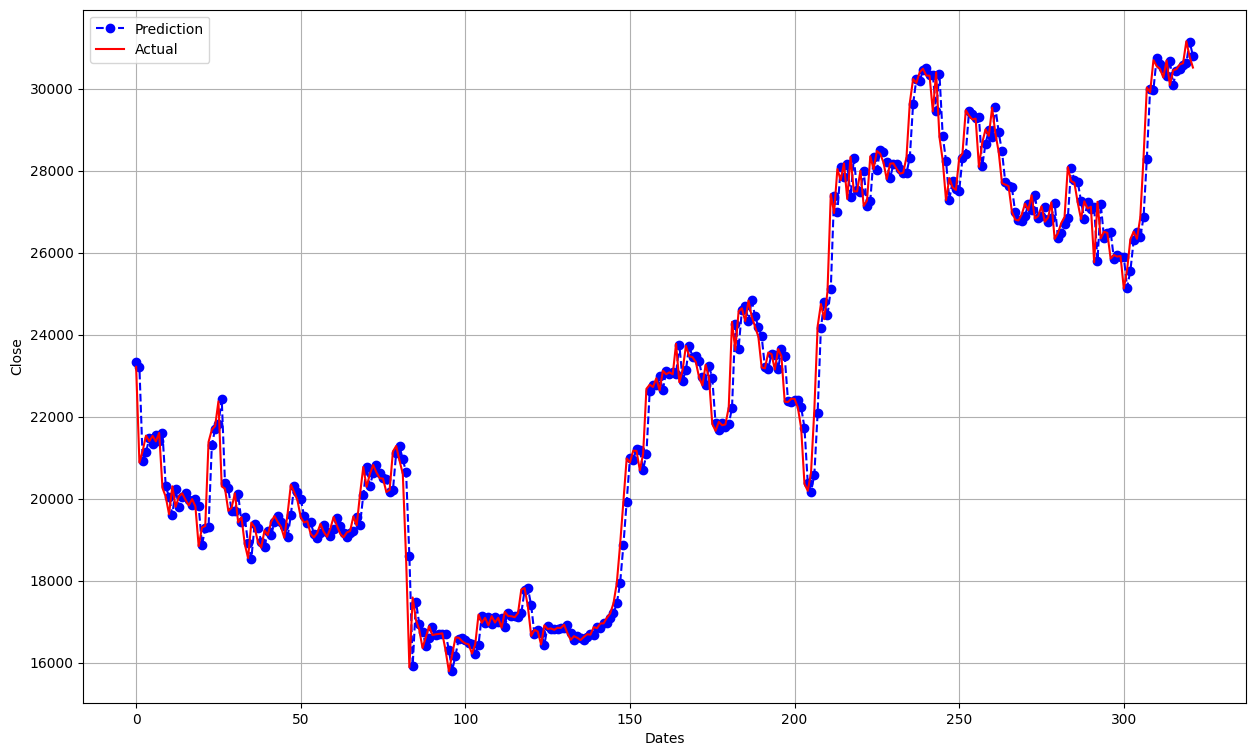

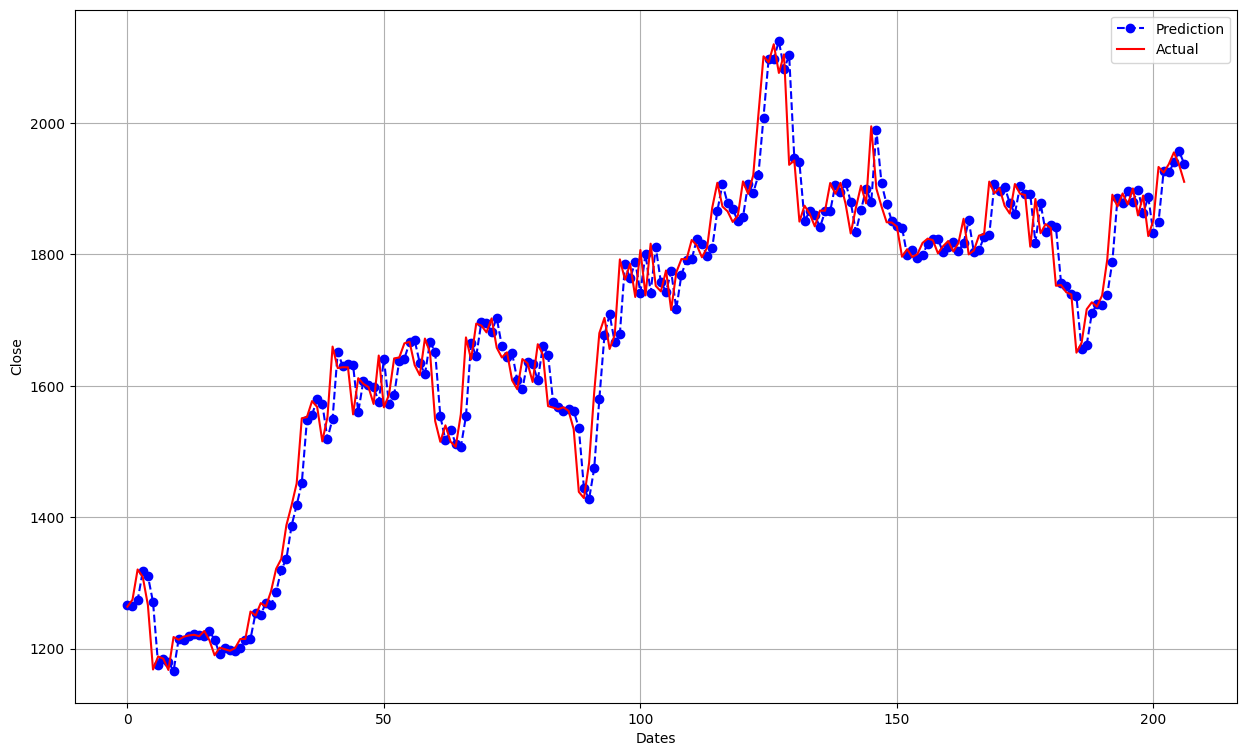

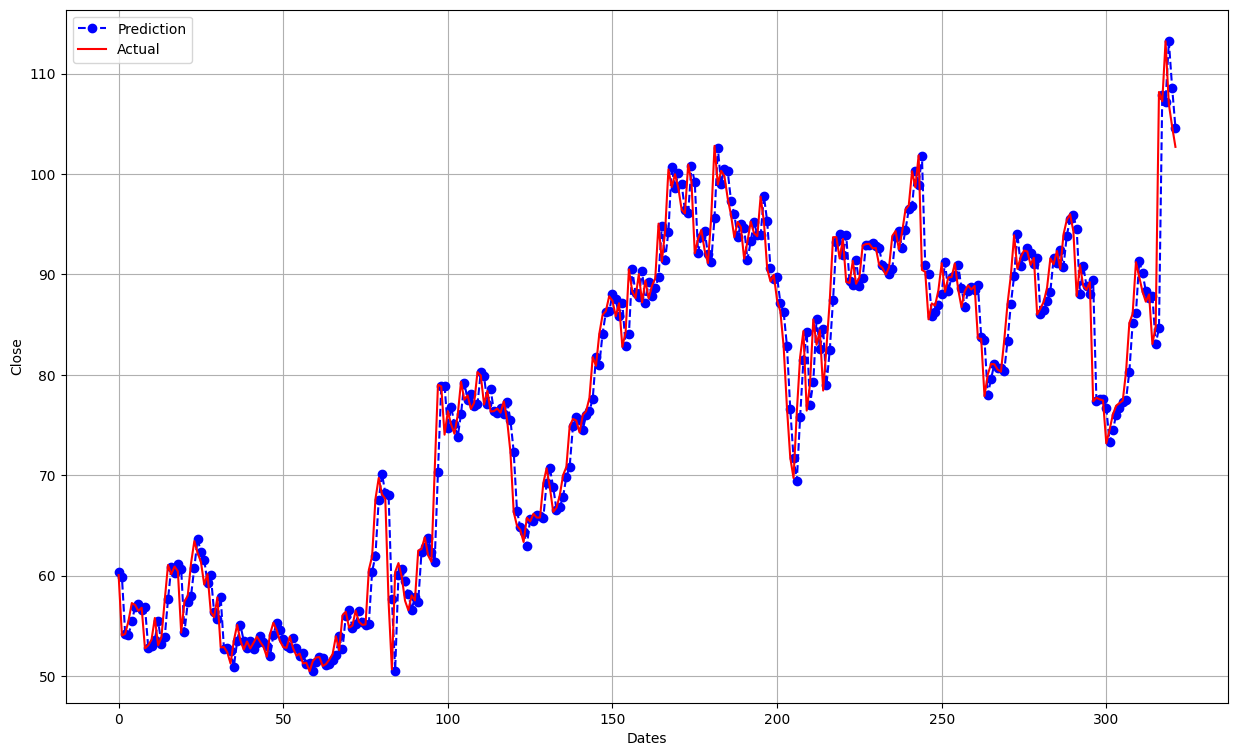

Bitcoin MAPE: 0.017769654823933723
Ethereum MAPE: 0.018700171847744133
Litecoin MAPE: 0.028195071062277515


In [16]:


def predict_crypto_price(train, test):
    model_pred = []
    train_data = train.copy()

    n = len(test)
    for i in range(n):
        model = sm.tsa.arima.ARIMA(train_data, order=(4, 1, 0))
        model_fit = model.fit()
        output = model_fit.forecast()

        yhat = list(output)[0]
        model_pred.append(yhat)

        actual = test[i]
        train_data.append(actual)

    comparison_df = pd.DataFrame({'Prediction': model_pred, 'Actual': test})

    mape = np.mean(np.abs(np.array(model_pred) - np.array(test)) / np.abs(test))
    
    plt.figure(figsize=(15, 9))
    plt.grid(True)
    ran = range(len(test))
    plt.xlabel('Dates')
    plt.plot(ran, model_pred, color='blue', marker='o', linestyle='dashed', label='Prediction')
    plt.ylabel('Close')
    plt.plot(ran, test, color='red', label='Actual')
    plt.legend()
    plt.show()

    return mape, comparison_df, model_fit


bmape, bcomparison_df, bmodel = predict_crypto_price(btrain, btest)
emape, ecomparison_df, emodel = predict_crypto_price(etrain, etest)
lmape, lcomparison_df, lmodel = predict_crypto_price(ltrain, ltest)

print("Bitcoin MAPE:", bmape)
print("Ethereum MAPE:", emape)
print("Litecoin MAPE:", lmape)


#Save the models
with open("bmodel.pkl", "wb") as file:
    pickle.dump(bmodel, file)
with open("emodel.pkl", "wb") as file:
    pickle.dump(emodel, file)
with open("lmodel.pkl", "wb") as file:
    pickle.dump(lmodel, file)

### Comparison results

In [8]:
print("Bitcoin :", bcomparison_df.tail(6))
print("Ethereum :", ecomparison_df.tail(6))
print("Litecoin :", lcomparison_df.tail(6))


Bitcoin :        Prediction        Actual
316  30432.908061  30477.251953
317  30480.409600  30590.078125
318  30576.019958  30620.769531
319  30632.921918  31156.439453
320  31146.602998  30777.582031
321  30796.135191  30514.166016
Ethereum :       Prediction       Actual
201  1849.272239  1933.188965
202  1927.316382  1924.565918
203  1924.803957  1937.438354
204  1940.011807  1955.389160
205  1957.028734  1936.633545
206  1938.216147  1910.588013
Litecoin :      Prediction      Actual
316   84.626780  108.165329
317  107.848064  107.229202
318  107.182422  113.217293
319  113.205715  106.945770
320  108.586529  104.710991
321  104.608623  102.693993


### Test the model

In [9]:
def predict_future_price(crypto_type, model_fit, train, future_dates):
    model_pred = []
    predictions = []

    for date in future_dates:
        train_data = train.copy()  # Create a copy of the training data for each iteration

        # Make prediction for the future date
        forecast = model_fit.forecast(steps=1)
        prediction = forecast[0]
        train_data.append(prediction)  # Update the copy of the training data with the predicted value

        # Retrain the model with the updated training data
        model = sm.tsa.arima.ARIMA(train_data, order=(4, 1, 0))
        model_fit = model.fit()
        model_pred.append(prediction)
        predictions.append((date, prediction))

    # Create a DataFrame for side-by-side comparison
    df_predictions = pd.DataFrame(predictions, columns=['Date', 'Prediction'])
    df_predictions.set_index('Date', inplace=True)

    return model_pred, df_predictions, model_fit



In [10]:
future_dates = ['2024-09-30']  # Example dates, replace with user input
crypto_type = 'Ethereum'  # Example cryptocurrency type, replace with user input

if crypto_type == 'Bitcoin':
    train = btrain
    model_fit = bmodel
    predictions, df_predictions, bmodel = predict_future_price(crypto_type, model_fit, train, future_dates)
    with open("bmodel.pkl", "wb") as file:
        pickle.dump(bmodel, file)
elif crypto_type == 'Ethereum':
    train = etrain
    model_fit = emodel
    predictions, df_predictions, emodel = predict_future_price(crypto_type, model_fit, train, future_dates)
    with open("emodel.pkl", "wb") as file:
        pickle.dump(emodel, file)
    
elif crypto_type == 'Litecoin':
    train = ltrain
    model_fit = lmodel
    predictions, df_predictions, lmodel = predict_future_price(crypto_type, model_fit, train, future_dates)
    with open("lmodel.pkl", "wb") as file:
        pickle.dump(lmodel, file)
else:
    raise ValueError("Invalid cryptocurrency type. Choose one from 'bitcoin', 'ethereum', or 'litecoin'.")

# predictions, df_predictions, bmodel = predict_future_price(crypto_type, model_fit, train, future_dates)

# Print predictions for the specified cryptocurrency
print(f"{crypto_type.capitalize()} Predictions:")
print(df_predictions)


Ethereum Predictions:
             Prediction
Date                   
2024-09-30  1938.216147
